In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
import string
import re
import nltk
nltk.download('stopwords',quiet=True)

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:/Users/POTHIREDDY YAMINI/Downloads/spam_twitter_detection/spam_twitter_detection/spam.csv',encoding='latin-1')
df.rename(columns = {'v1':'label', 'v2':'message'}, inplace=True)
df.head(2)

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN


In [6]:
df = df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])
print("Shape of dataset is {}".format(df.shape))
print("Duplicates present {}".format(df.duplicated().sum()))

#remove duplicates
df.drop_duplicates(inplace=True)

print("Shape of dataset after removing duplicates is {}".format(df.shape))

KeyError: "['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'] not found in axis"

In [ ]:
df.head()

In [ ]:
Le = LabelEncoder()
df['label']=Le.fit_transform(df['label'])
print('0 means.... {}'.format(Le.inverse_transform([0])))
print('1 means.... {}'.format(Le.inverse_transform([1])))

In [7]:
df.head()


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.to_csv("data.csv", sep='\t')

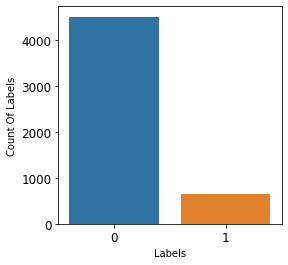

--------------------------------------------------
4516 are not spam and 653 are spam respectivley.
--------------------------------------------------


In [9]:
label_count = df.label.value_counts()
from numpy.ma.core import size
plt.figure(figsize=(4,4))
ax = sns.countplot('label',data = df)
plt.xticks(size = 12)
plt.xlabel('Labels')
plt.yticks(size = 12)
plt.ylabel('Count Of Labels')
plt.show()
print('-'*50)
print('{0} are not spam and {1} are spam respectivley.'.format(label_count[0],label_count[1]))
print('-'*50)


In [12]:
def preprocess_text(message):
    
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    
    """
    # Check characters to see if they are in punctuation
    # To check punctuations, we will use string.punctuation

    without_punc = [char for char in message if char not in string.punctuation]

    # Join the characters again to form the string.
    without_punc = ''.join(without_punc)
    
    # Now just remove any stopwords and return the list of the cleaned text
    return [word for word in without_punc.split() if word.lower() not in stopwords.words('english')]

In [19]:
df['message'].apply(preprocess_text).head(2)


0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
Name: message, dtype: object

In [10]:
X = df['message'] #text data
y = df['label'] #target label

# CountVectorizer is used to transform a given text into a vector on the
# basis of the frequency (count) of each word that occurs in the entire text

cv = CountVectorizer() 
X =  cv.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


In [12]:
classifier = MultinomialNB().fit(X_train, y_train)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3631
           1       0.98      0.97      0.97       504

    accuracy                           0.99      4135
   macro avg       0.99      0.98      0.99      4135
weighted avg       0.99      0.99      0.99      4135

--------------------------------------------------
Accuracy :  0.9939540507859734
--------------------------------------------------
Confusion Matrix:



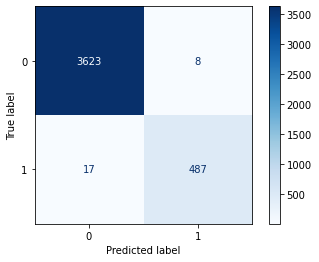

In [13]:
pred_train = classifier.predict(X_train)
print(classification_report(y_train, pred_train))
print('-'*50)
print('Accuracy : ',accuracy_score(y_train, pred_train))
print('-'*50)
print('Confusion Matrix:\n')
plot_confusion_matrix(classifier, X_train, y_train,cmap=plt.cm.Blues);

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       885
           1       0.91      0.93      0.92       149

    accuracy                           0.98      1034
   macro avg       0.95      0.96      0.95      1034
weighted avg       0.98      0.98      0.98      1034

--------------------------------------------------
Accuracy :  0.97678916827853
--------------------------------------------------
Confusion Matrix:



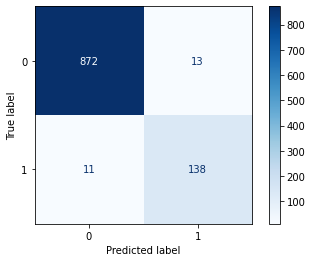

In [14]:
pred_test = classifier.predict(X_test)
print(classification_report(y_test, pred_test))
print('-'*50)
print('Accuracy : ',accuracy_score(y_test, pred_test))
print('-'*50)
print('Confusion Matrix:\n')
plot_confusion_matrix(classifier, X_test, y_test,cmap=plt.cm.Blues);

In [15]:
# print the actual values
print('Actual Labels: {}'.format(y_test.iloc[0:10].values))

# print the predictions
print('Predicted Labels: {}'.format(pred_test[0:10]))

Actual Labels: [0 0 0 0 0 0 0 0 1 1]
Predicted Labels: [0 0 0 0 0 0 0 0 1 1]


In [16]:
def sms(text):
    # creating a list of labels
    lab = ['not a spam','a spam'] 
    # perform tokenization
    X = cv.transform(text).toarray()
    # predict the text
    p = classifier.predict(X)
    # convert the words in string with the help of list
    s = [str(i) for i in p]
    a = int(''.join(s))
    # show out the final result
    res = str("This message is "+ lab[a])
    return res

In [17]:
sms(['Hey! I hope everything is fine. Take care!'])

'This message is not a spam'

In [18]:
from tkinter import *
import tkinter as tk
gui = Tk()
gui.configure(background= 'light yellow')
gui.title('Spam Detection')
gui.geometry('600x500')

head = Label(gui,text = 'Type Your Message', font=('times',14,'bold'),bg='light yellow')
head.pack()

message = Entry(gui, width=400, borderwidth = 2)
message.pack(ipady=50)
result = Label(gui)
def sms():
    global result
    result.destroy()
    global message
    text = message.get()
    # creating a list of labels
    lab = ['not a spam','a spam'] 
    
    # perform tokenization
    X = cv.transform([text]).toarray()
    
    # predict the text
    p = classifier.predict(X)
    
    # convert the words in string with the help of list
    s = [str(i) for i in p]
    a = int("".join(s))
    
    # show out the final result
    res = str("This message is "+ lab[a])
    #print(text,res)
    result = Label(gui,text=res,font=('times',18,'bold'),fg = 'blue',bg='light yellow')
    result.pack()
    
b = Button(gui,text='Click To Check',font=('times',12,'bold'), fg = 'white',bg ='green',command = sms)
b.pack()

gui.mainloop()